+ We use CAPM to measure systematic risk

+ It is a linear relationship between the stock returns(ra) and market returns(rm)

+ CAPM : expected return of asset = risk-free-rate + $beta_a$(market return - risk-free-rate)

+ $beta_a$ measures the sensitivity of our asset relative to the market, it is the only measure of risk in CAPM

+ $beta_a$ = $\frac{Cov(ra,rm)}{var(rm)}$

+ $beta_a$ > 1 = asset is more sensitive/ riskier than market

+ $beta_a$ < 1 = asset is less sensitive/ less risker than market

+ $beta_a$ = 1 - asset moves or matches the market

+ The market is represented by the ALSI40 index in South Africa and S&P500 in the United States



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


            s_close_price  m_close_price  s_returns  m_returns
Date                                                          
2010-02-28      73.303322    1104.489990   0.042696   0.028115
2010-03-31      73.931694    1169.430054   0.008536   0.057133
2010-04-30      74.364014    1186.689941   0.005831   0.014651
2010-05-31      72.578163    1089.410034  -0.024308  -0.085532
2010-06-30      71.546776    1030.709961  -0.014313  -0.055388
...                   ...            ...        ...        ...
2016-08-31     106.588173    2170.949951  -0.002292  -0.001220
2016-09-30     106.568016    2168.270020  -0.000189  -0.001235
2016-10-31     103.106346    2126.149902  -0.033022  -0.019617
2016-11-30     109.816170    2198.810059   0.063047   0.033604
2016-12-31     112.368263    2238.830078   0.022974   0.018037

[83 rows x 4 columns]
the beta for imb: 0.7135095337146751
IBM BETA is: 0.7135095337146754
E(Ra): 0.09011311070049227


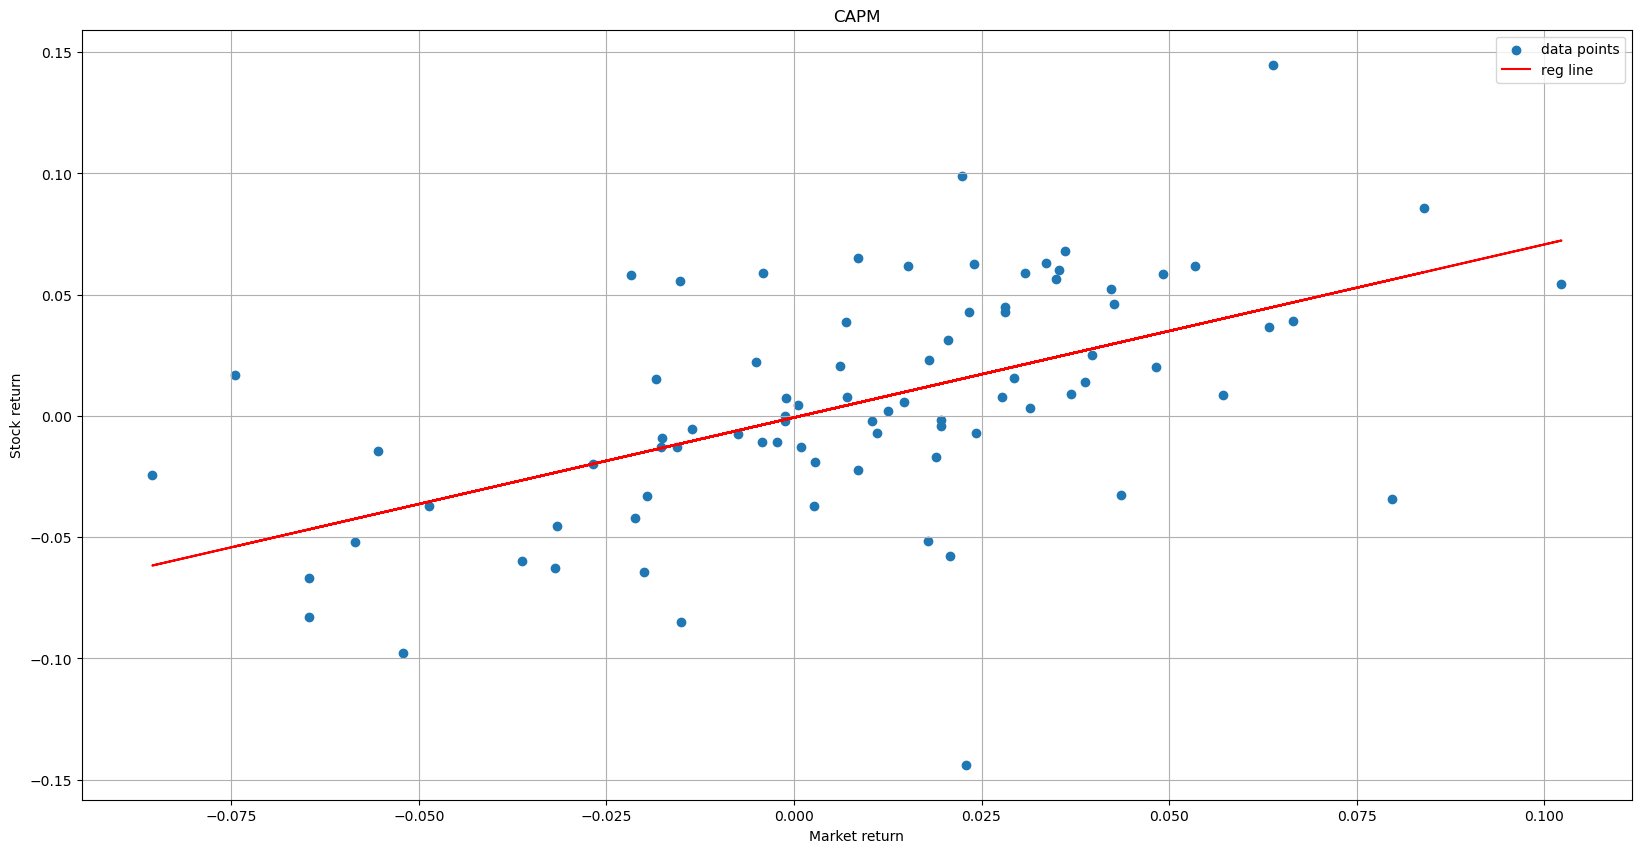

In [21]:
import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

RFR = 0.05
N = 12

class CAPM:
    def __init__(self, stocks, start_date, end_date):
        self.data = None #uing the dataset as its self, which is nothing in the beginning
        self.stocks = stocks
        self.start_date = start_date
        self.end_date = end_date
        
    #lets get the necessary data for the program
    def down_data(self):
        
        data = {} #store our data into a dictionary
        
        for stocks in self.stocks:
            ticker = yf.download(stocks, self.start_date, self.end_date)
            data[stocks] = ticker['Adj Close']
        return pd.DataFrame(data)
    
    
    #computing the beta and alpha parameters
    #with this function we save our stock data using the month end closting price by making use of .last()
    def initialize(self):
        stock_data = self.down_data()
        #print(stock_data)
        stock_data = stock_data.resample('M').last() #we will work with monyhly returns
        #print(stock_data)
        #monthly returns are preferred over daily returns for long term investing
        #monthly returns are atleast normlly distribution, as most models work well under normal assumptions
        #daily returns are preferred for short term investing
        #the line of code below is used to create a dataframe of our returns for the stock at interest and the market returns
        self.data = pd.DataFrame({'s_close_price': stock_data[self.stocks[0]],
                                 'm_close_price': stock_data[self.stocks[1]]})
        #now lets get the returns, remove the first row after calc. returns
        self.data[['s_returns', 'm_returns']] = np.log(self.data[['s_close_price', 'm_close_price']]/
                                                      self.data[['s_close_price', 'm_close_price']].shift(1))
        
        self.data = self.data[1:]
        print(self.data)
        
        #now lets obatin a symmetric matrix to calculate the the beta of the stock
    def beta_calc(self):
        cov_mat = np.cov(self.data['s_returns'], self.data['m_returns'])
        beta = cov_mat[0,1]/cov_mat[1,1]
        print("the beta for imb:",beta)
        
        #the same beta can be obtsined by making use of linear regression
        # it will be a 2d plot of the stock returns(Y) and the market returns(x), i.e our stock return is 
        #dependent on the market returns
        
    def regression(self):
        beta, alpha = np.polyfit(self.data['m_returns'], self.data['s_returns'], deg = 1) #fit a regression with diffeent order, i.e linear deg=1
        #use beta and alpha to calculate the expected return
        #we need rfr and number of months
        print("IBM BETA is:", beta)
        expected_return = RFR + beta*(self.data['m_returns'].mean()*12 - RFR)
        print("E(Ra):", expected_return)
        self.plot_regression(alpha, beta)#create regression plot
        
    def plot_regression(self, alpha, beta):
        fig, axis = plt.subplots(1, figsize =(20,10))
        axis.scatter(self.data['m_returns'], self.data['s_returns'], label="data points")
        axis.plot(self.data['m_returns'], beta*self.data['m_returns']+alpha, color= 'red', label = "reg line") #our reg line
        plt.title("CAPM")
        plt.xlabel("Market return")
        plt.ylabel("Stock return")
        plt.legend()
        plt.grid(True)
        plt.show()
if __name__ == "__main__":
    capm = CAPM(["IBM", "^GSPC"], '2010-01-01', '2017-01-01')
    capm.initialize()    
    capm.beta_calc()
    capm.regression()